In [1]:
#links:
#https://towardsdatascience.com/back-to-basics-assumptions-of-common-machine-learning-models-e43c02325535
#https://www.analyticsvidhya.com/blog/2016/07/deeper-regression-analysis-assumptions-plots-solutions/
#https://towardsdatascience.com/assumptions-of-multiple-linear-regression-d16f2eb8a2e7

#https://www.kaggle.com/code/raghurayirath/complete-guide-assumptions-of-linear-regression
#https://www.kaggle.com/code/arunmohan003/linear-regression-analysis-validating-assumptions
#https://www.kaggle.com/code/shrutimechlearn/step-by-step-assumptions-linear-regression

In [54]:
import numpy as np
import pandas as pd
import hvplot.pandas
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import datasets
import warnings
warnings.filterwarnings(action="ignore")

#### CRIM - per capita crime rate by town
#### ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
#### INDUS - proportion of non-retail business acres per town.
#### CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
#### NOX - nitric oxides concentration (parts per 10 million)
#### RM - average number of rooms per dwelling
#### AGE - proportion of owner-occupied units built prior to 1940
#### DIS - weighted distances to five Boston employment centres
#### RAD - index of accessibility to radial highways
#### TAX - full-value property-tax rate per Dollar 10,000
#### PTRATIO -  pupil-teacher ratio by town
#### B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#### LSTAT - % lower status of the population
#### MEDV - Median value of owner-occupied homes in $1000's

In [26]:
#Lets load the dataset and sample some
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('C:/BITsPilaniMTECH2123/Sem2/ML/Practice_2023/housing.csv',header=None, delimiter=r"\s+", names=column_names)
print(data.shape)
data.head()

(506, 14)


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [27]:
data.describe().T

count        mean         std        min         25%        50%  \
CRIM     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
CHAS     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
RAD      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
TAX      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
PTRATIO  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
B        506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
LSTAT    506.0   12.653063    7.141062    1.73000    6.950000   11.36000   
MEDV     506.0   22.532806    9.197104    5.00000   17.025000   21.20000   

                75%       max  
CRIM       3.677083   88.9762  
ZN        12.500000  100.0000  
INDUS     18.100000   27.7400  
CHAS       0.000000    1.0000  
NOX        0.624000    0.8710  
RM         6.623500    8.7800  
AGE       94.075000  100.0000  
DIS        5.188425   12.1265  
RAD       24.000000   24.0000  
TAX      666.000000  711.0000  
PTRATIO   20.200000   22.0000  
B        396.225000  396.9000  
LSTAT     16.955000   37.9700  
MEDV      25.000000   50.0000

In [33]:
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:,column_sels]
y = data['MEDV']

In [34]:
#OLS Regression Results
X = sm.add_constant(X)
model = sm.OLS(y,X)
result = model.fit()

In [35]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 08 Jun 2023   Prob (F-statistic):          6.72e-135
Time:                        22:31:12   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

## 1) Linear Relationship

### For checking this assumption, we can use **`scatter plot`** to visualise the relationship between independent variable and target variable.
### high coef high linear relationship, low coef low linear relationship
###  if the relationship is not linear, we can do **`transformations`** to get the relationship near to linear


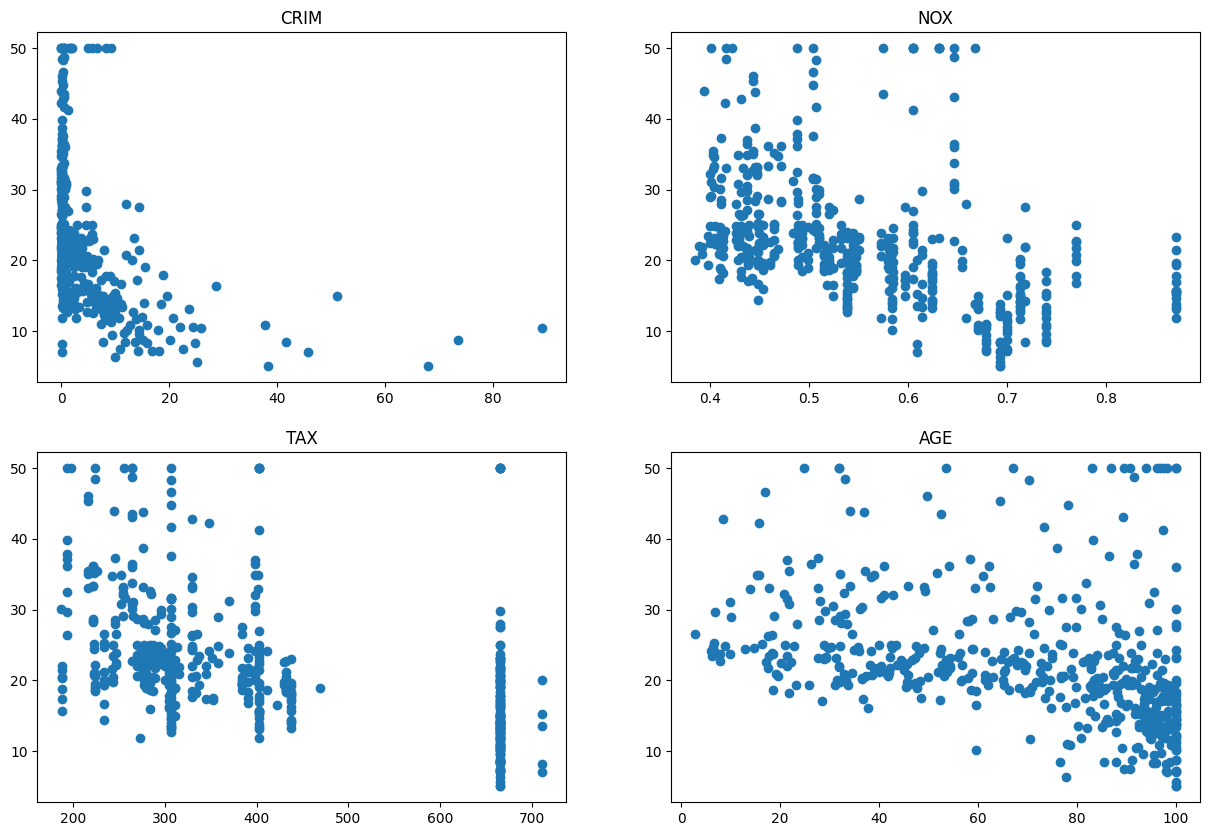

In [36]:
plt.rcParams["figure.figsize"] =(15,10)
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2,2)

ax1.scatter(data['CRIM'], data['MEDV'])
ax1.set_title("CRIM")
ax2.scatter(data['NOX'], data['MEDV'])
ax2.set_title("NOX")
ax3.scatter(data['TAX'], data['MEDV'])
ax3.set_title("TAX")
ax4.scatter(data['AGE'], data['MEDV'])
ax4.set_title("AGE")

plt.show()

## 2) Multi-collinearity

#### Variance inflation factor
#### By calculating **`variance_inflation_factor`**, we can check the multicollinearity between independent varibales.
#### If VIF score greater than 5 means, we can eliminate those varibale from our analysis.
#### The reason is that information is already present in another variable.

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = {X.columns[i]: variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])}

In [38]:
pd.DataFrame({'VIF': VIF}, index=X.columns)

VIF
const         NaN
CRIM     1.792192
ZN       2.298758
INDUS    3.991596
CHAS     1.073995
NOX      4.393720
RM       1.933744
AGE      3.100826
DIS      3.955945
RAD      7.484496
TAX      9.008554
PTRATIO  1.799084
B        1.348521
LSTAT    2.941491

<AxesSubplot: >

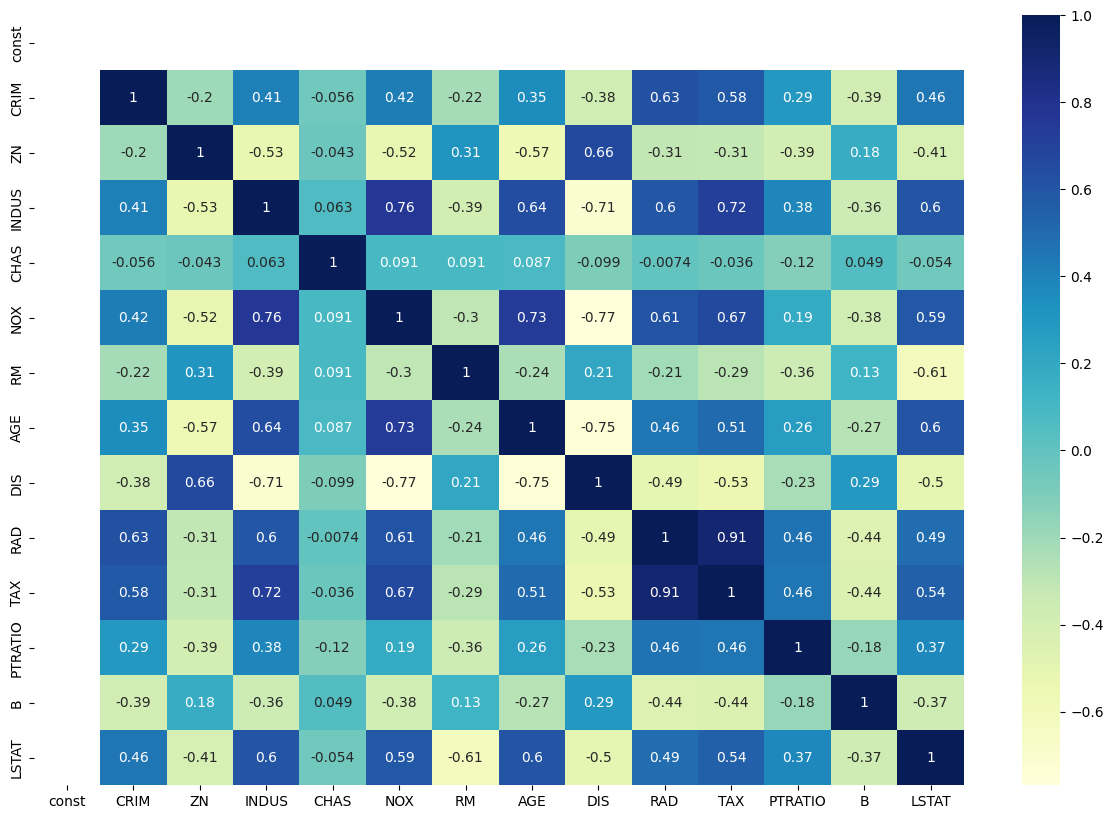

In [39]:
#Heatmap
sns.heatmap(X.corr(),annot=True, cmap="YlGnBu")

## 3) Normality of Residual

#### To check the normality of the residual, we can plot Q-Q plot, or histogram mean of residial will be close to zero, of the residual is normally distributed

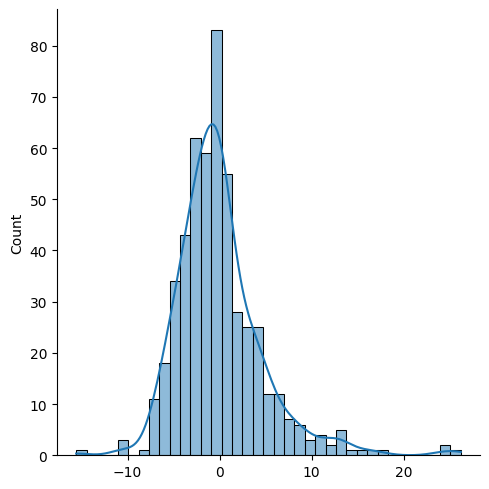

In [41]:
#Distplot residual
residual = result.resid
sns.displot(residual, kde=True)

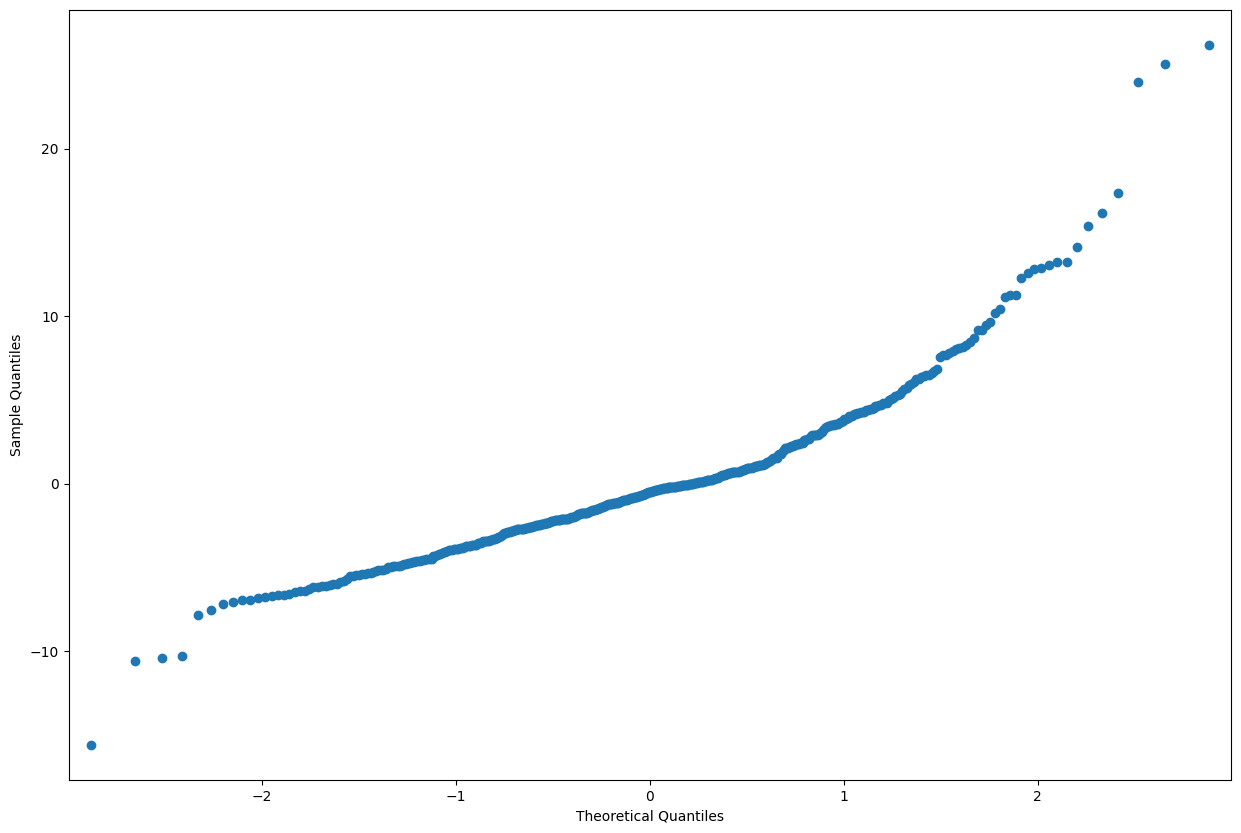

In [43]:
#QQ Plot
residual = result.resid
sm.qqplot(residual)
plt.show()

## 4) Homoscedasticity - constant variance

#### If we plot the erros/ residuals vs predicted value. Erros should be random for all the predicted values

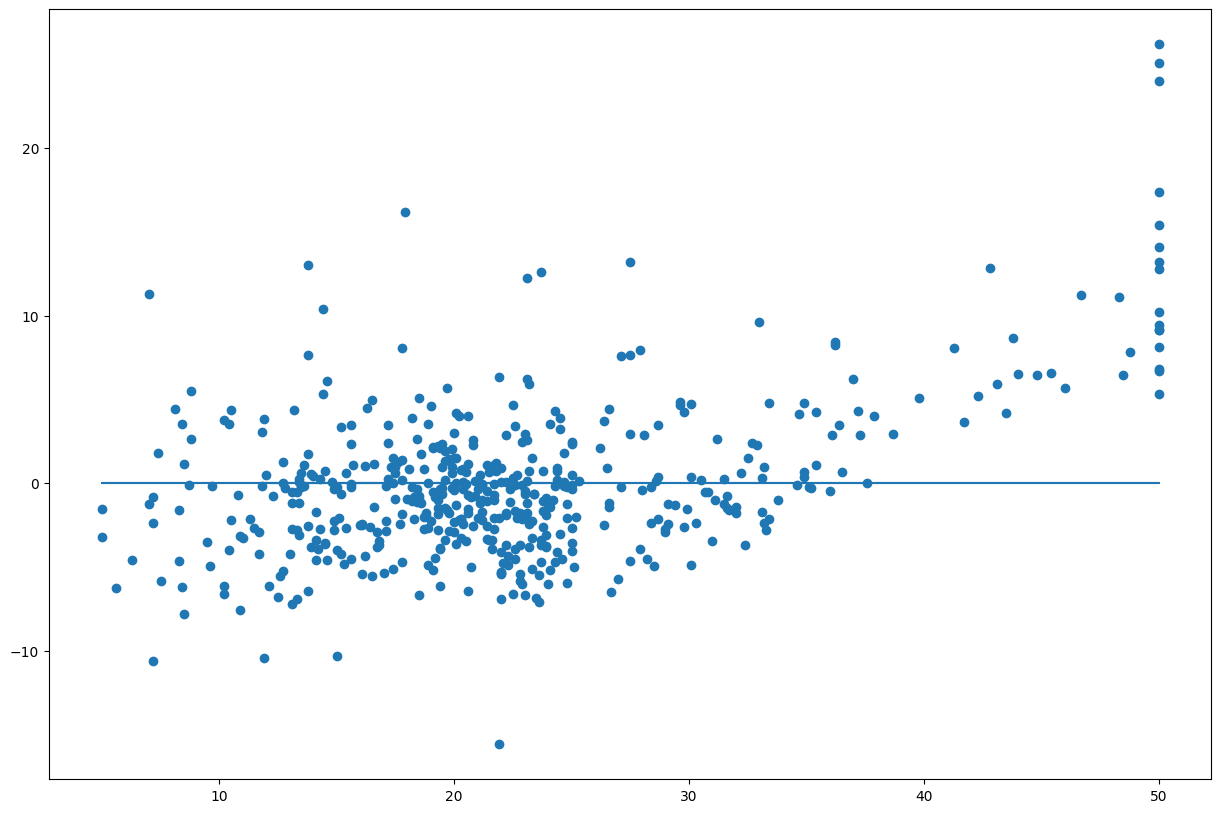

In [44]:
residual = result.resid
plt.scatter(y, residual)
plt.plot(y, [0]*len(y))

## 5) No Autocorrelation of Residuals

#### Residuals should not be related to each other. If residuals are related to each other, algorithm cant capture the pattern properly.

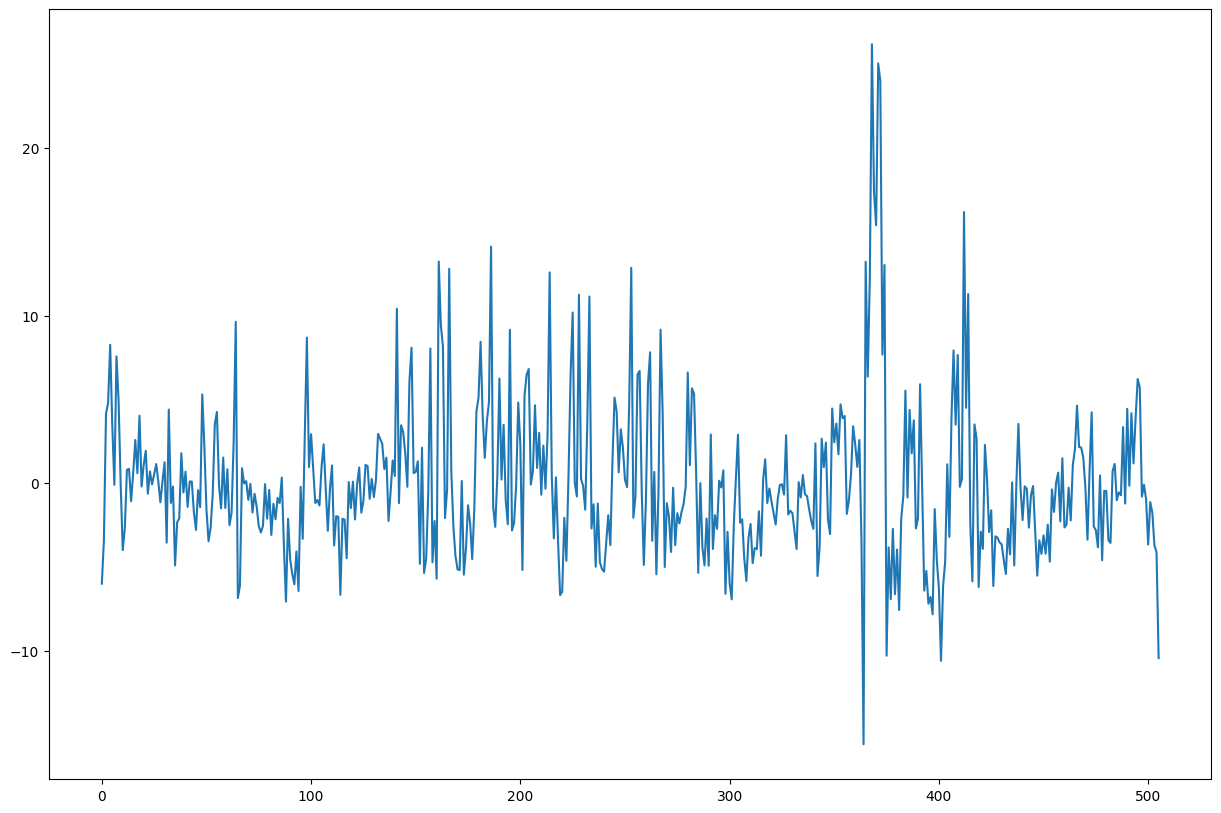

In [45]:
plt.plot(residual.index,residual)

## 6) Observations should be indepdent or not related to each other.

In [48]:
print(data.shape)
data.head(2)

(506, 14)


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   

   PTRATIO      B  LSTAT  MEDV  
0     15.3  396.9   4.98  24.0  
1     17.8  396.9   9.14  21.6

In [ ]:
#Models
#https://www.kaggle.com/code/faressayah/practical-introduction-to-10-regression-algorithm

## Exploratory Data Analysis (EDA)

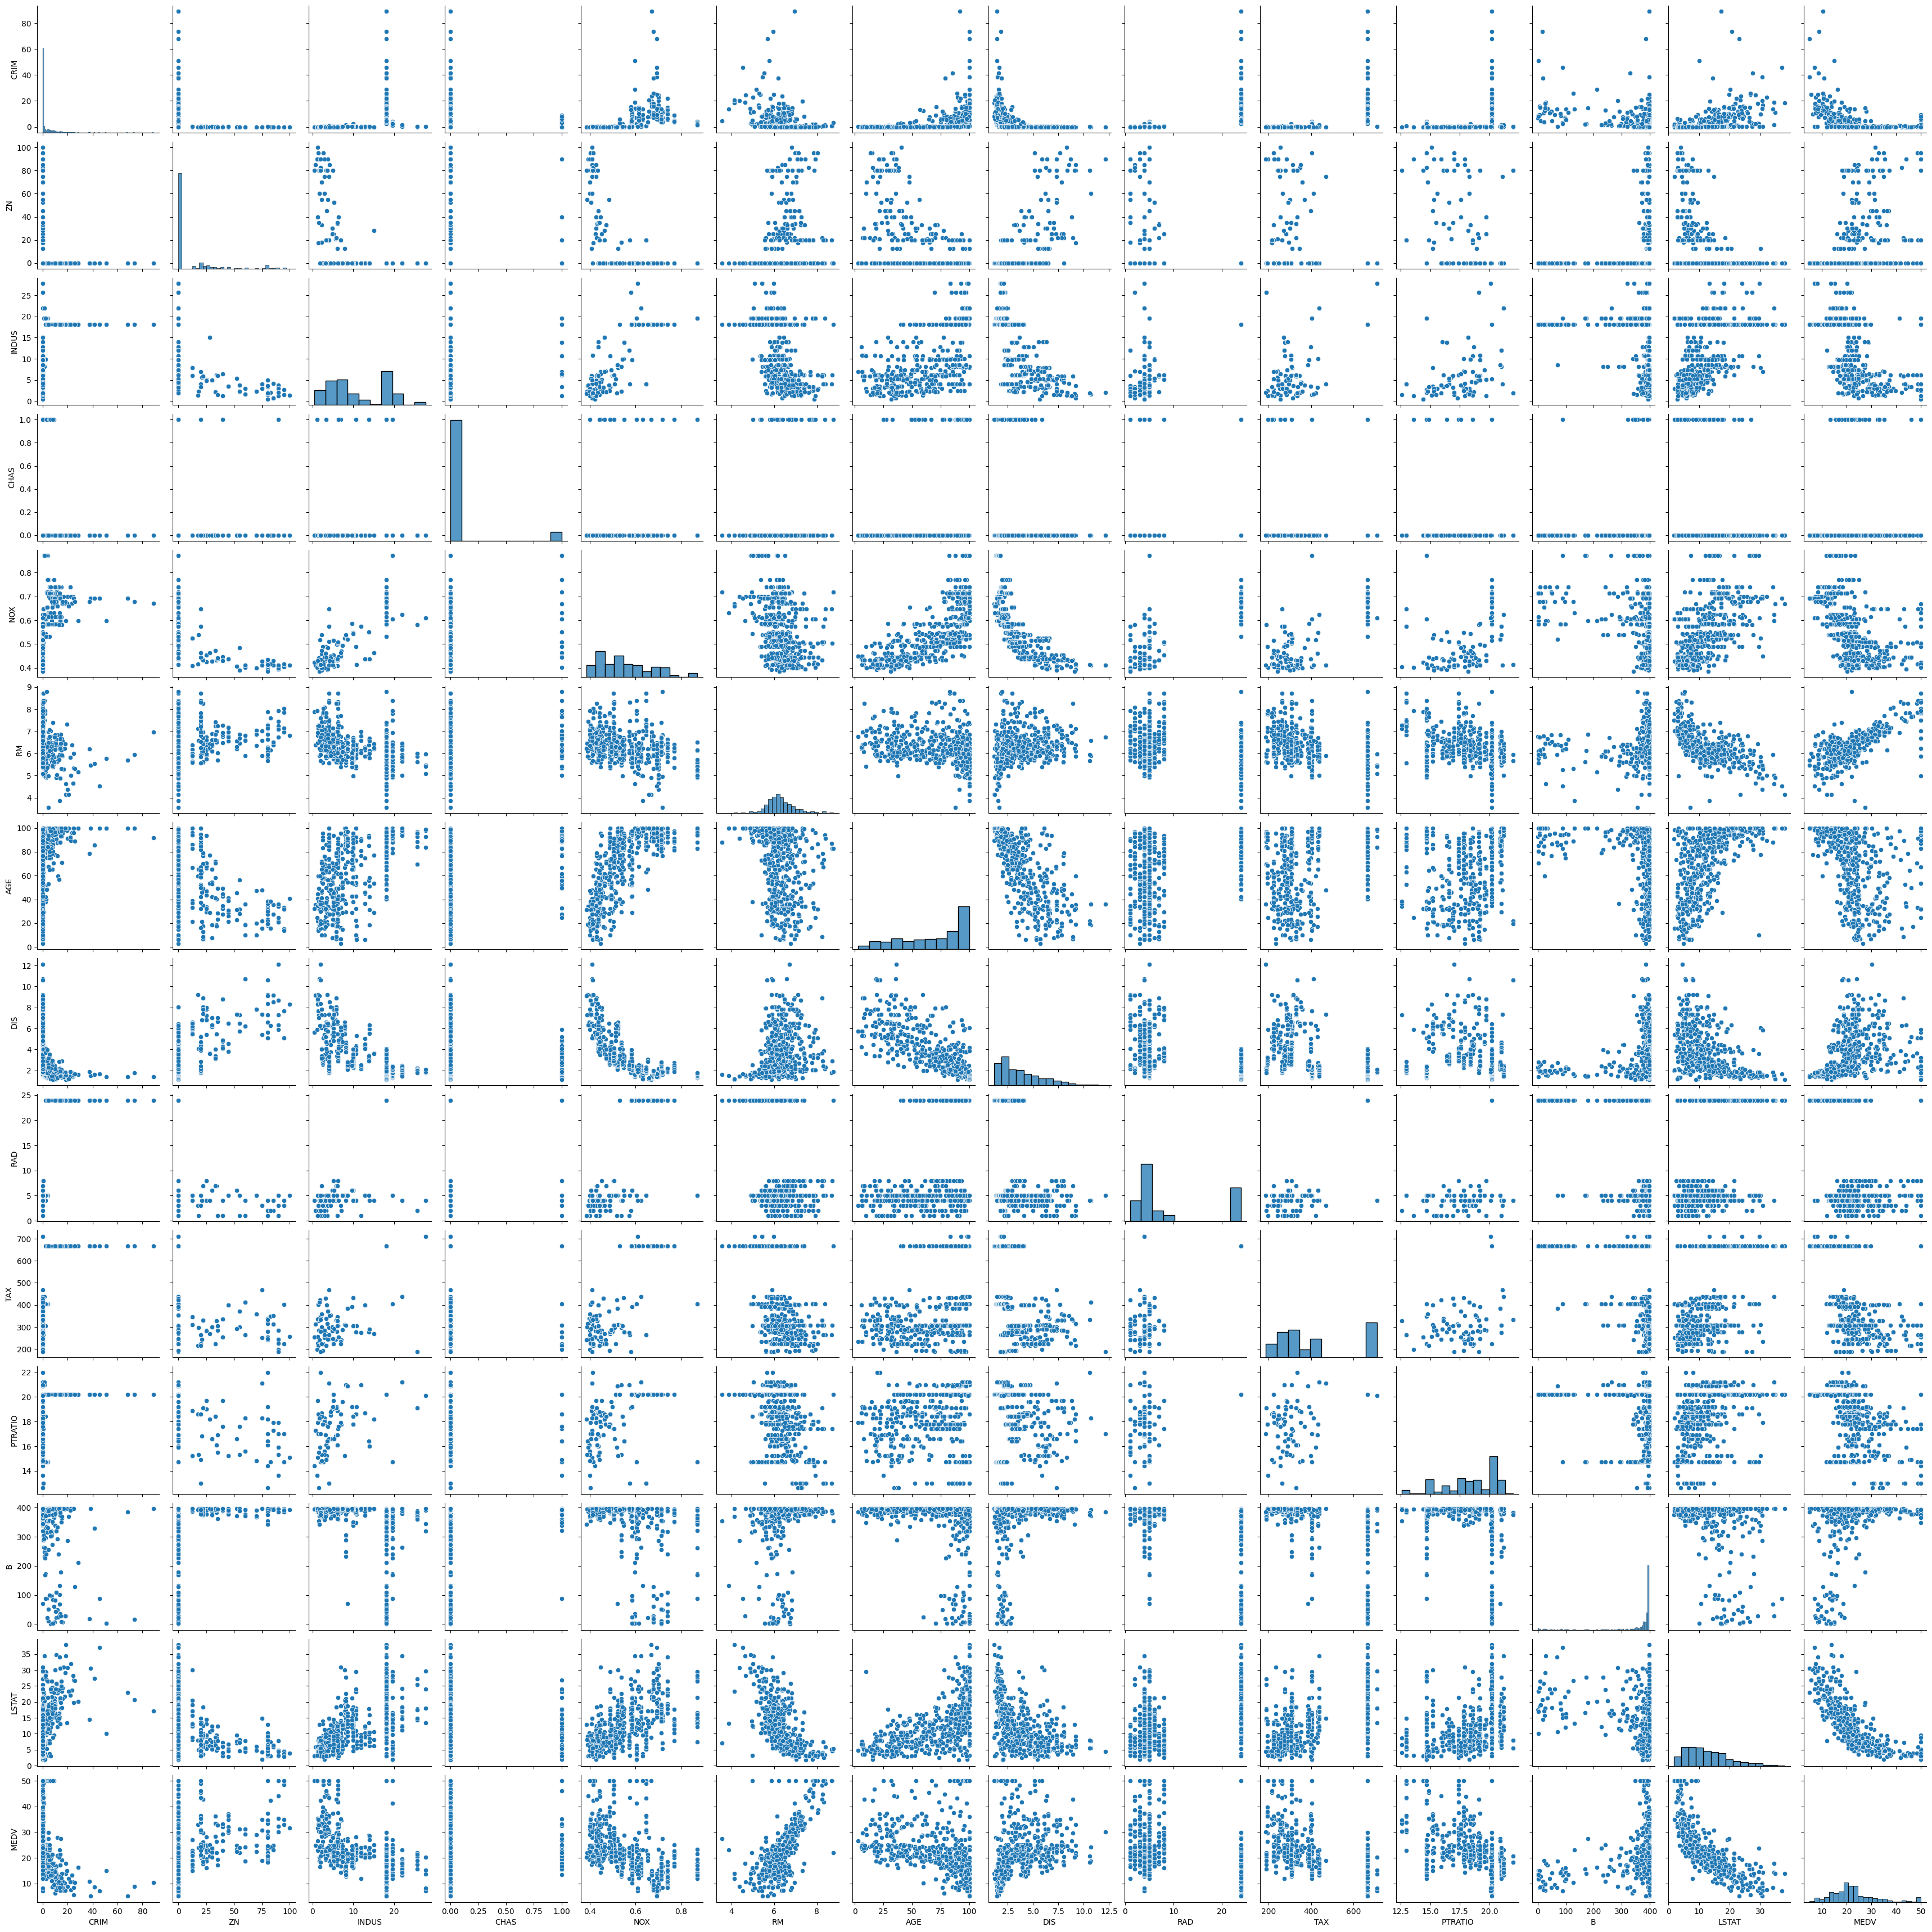

In [50]:
sns.pairplot(data)

In [55]:
data.hvplot.hist(by='MEDV', subplots=False, width=1000)

:NdOverlay   [Element]
   :Histogram   [LSTAT]   (LSTAT_count)

In [56]:
data.hvplot.hist("MEDV")

:Histogram   [MEDV]   (MEDV_count)

In [59]:
data.hvplot.scatter(x='INDUS', y='MEDV')

:Scatter   [INDUS]   (MEDV)

<AxesSubplot: >

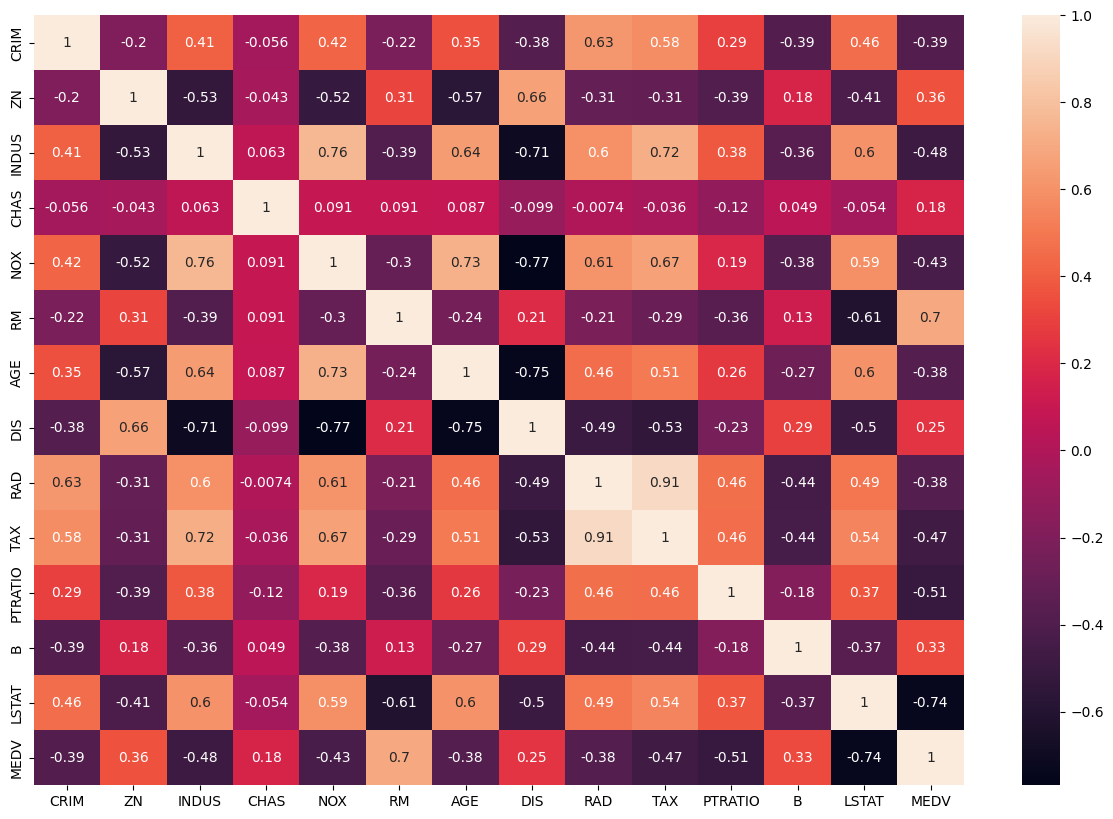

In [60]:
sns.heatmap(data.corr(), annot=True)

## Training a Linear Regression Model

In [61]:
#X and y arrays
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:,column_sels]
y = data['MEDV']

In [62]:
#Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [63]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

## Preparing Data For Linear Regression

### Try different preparations of your data using these heuristics and see what works best for your problem.

### Linear Assumption. Linear regression assumes that the relationship between your input and output is linear. It does not support anything else. This may be obvious, but it is good to remember when you have a lot of attributes. You may need to transform data to make the relationship linear (e.g. log transform for an exponential relationship).
### Remove Noise. Linear regression assumes that your input and output variables are not noisy. Consider using data cleaning operations that let you better expose and clarify the signal in your data. This is most important for the output variable and you want to remove outliers in the output variable (y) if possible.
### Remove Collinearity. Linear regression will over-fit your data when you have highly correlated input variables. Consider calculating pairwise correlations for your input data and removing the most correlated.
### Gaussian Distributions. Linear regression will make more reliable predictions if your input and output variables have a Gaussian distribution. You may get some benefit using transforms (e.g. log or BoxCox) on your variables to make their distribution more Gaussian looking.
### Rescale Inputs: Linear regression will often make more reliable predictions if you rescale input variables using standardization or normalization.

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([ ('std_scalar', StandardScaler())])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

## Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [66]:
# print the intercept
print(lin_reg.intercept_)

23.01581920903955


In [67]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficient
const       0.000000
CRIM       -1.108346
ZN          0.808440
INDUS       0.343135
CHAS        0.813864
NOX        -1.798043
RM          2.913858
AGE        -0.298939
DIS        -2.942511
RAD         2.094193
TAX        -1.447067
PTRATIO    -2.052322
B           1.023752
LSTAT      -3.885790

In [68]:
#Predictions from our Model
pred = lin_reg.predict(X_test)

pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

:Scatter   [True Values]   (Predicted Values)

In [69]:
#Residual Histogram
pd.DataFrame({'Error Values': (y_test - pred)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

In [70]:
#Regression Evaluation Metrics
# MAE is the easiest to understand, because it's the average error.
# MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
# RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

In [71]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 3.1627098714574124
MSE: 21.517444231177286
RMSE: 4.638689926172829
R2 Square 0.7112260057484923
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.3568267821682056
MSE: 22.545481487421426
RMSE: 4.748208239685937
R2 Square 0.7434997532004697
__________________________________


## Robust Regression

#### Robust regression is a form of regression analysis designed to overcome some limitations of traditional parametric and non-parametric methods. Robust regression methods are designed to be not overly affected by violations of assumptions by the underlying data-generating process
#### One instance in which robust estimation should be considered is when there is a strong suspicion of heteroscedasticity.
#### A common situation in which robust estimation is used occurs when the data contain outliers. 

In [72]:
#Random Sample Consensus - RANSAC
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 3.5996733900121822
MSE: 35.28885389683709
RMSE: 5.940442230746553
R2 Square 0.5264073566143046
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.5659440709247647
MSE: 33.90273722585452
RMSE: 5.822605707572386
R2 Square 0.6142881015664707
__________________________________


## Ridge Regression

#### Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares,

####  minw∣∣∣∣Xw−y∣∣∣∣22+α∣∣∣∣w∣∣∣∣22
 
#### α>=0
####   is a complexity parameter that controls the amount of shrinkage: the larger the value of  α
####  , the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

#### Ridge regression is an L2 penalized model. Add the squared sum of the weights to the least-squares cost function.

In [73]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 3.2794471340623246
MSE: 23.523824060493826
RMSE: 4.850136499161011
R2 Square 0.6842994660036883
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.4197100059245766
MSE: 24.836205632355732
RMSE: 4.983593646391701
R2 Square 0.7174381537241795
__________________________________


## LASSO Regression

#### A linear model that estimates sparse coefficients.

#### Mathematically, it consists of a linear model trained with  ℓ1 prior as regularizer. 

In [74]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 3.7355366575411377
MSE: 32.890962869125914
RMSE: 5.735064329990197
R2 Square 0.5585881566392769
__________________________________
Train set evaluation:
_____________________________________
MAE: 4.192504425593431
MSE: 37.7785062742652
RMSE: 6.146422233646595
R2 Square 0.57019342485664
__________________________________


##  Elastic Net

#### A linear regression model trained with L1 and L2 prior as regularizer. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both. A practical advantage of trading-off between Lasso and Ridge is it allows Elastic-Net to inherit some of Ridge’s stability under rotation. 

In [75]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 3.198511352071156
MSE: 22.69866292948289
RMSE: 4.76431138040776
R2 Square 0.6953735077506102
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.3329229272402174
MSE: 23.037910118227042
RMSE: 4.799782299045139
R2 Square 0.737897386029768
__________________________________


## Polynomial Regression

#### One common pattern within machine learning is to use linear models trained on nonlinear functions of the data. This approach maintains the generally fast performance of linear methods, while allowing them to fit a much wider range of data.

In [77]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 3.062646163137335
MSE: 25.224325433718533
RMSE: 5.022382445983035
R2 Square 0.6614779557676
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.6937168961864408
MSE: 4.660598112812824
RMSE: 2.1588418452524087
R2 Square 0.9469763124448295
__________________________________


## Stochastic Gradient Descent

#### Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function. Gradient Descent measures the local gradient of the error function with regards to the parameters vector, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum.

In [78]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 3.08806949564838
MSE: 23.854169745443592
RMSE: 4.8840730692162655
R2 Square 0.6798660750348635
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.275520903578535
MSE: 23.74836843665749
RMSE: 4.873229774662538
R2 Square 0.7298144921638791
__________________________________


## Artficial Neural Network

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=Adam(0.00001), loss='mse')

r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=1,
              epochs=100)

Epoch 1/100
354/354 [==============================] - 3s 3ms/step - loss: 603.5328 - val_loss: 509.2749
Epoch 2/100
354/354 [==============================] - 1s 2ms/step - loss: 574.6486 - val_loss: 475.9223
Epoch 3/100
354/354 [==============================] - 1s 2ms/step - loss: 528.1560 - val_loss: 423.6152
Epoch 4/100
354/354 [==============================] - 1s 3ms/step - loss: 456.6337 - val_loss: 348.4242
Epoch 5/100
354/354 [==============================] - 1s 3ms/step - loss: 360.9785 - val_loss: 261.1337
Epoch 6/100
354/354 [==============================] - 1s 3ms/step - loss: 263.4159 - val_loss: 188.3155
Epoch 7/100
354/354 [==============================] - 1s 3ms/step - loss: 187.8862 - val_loss: 141.9768
Epoch 8/100
354/354 [==============================] - 1s 3ms/step - loss: 142.0705 - val_loss: 118.3788
Epoch 9/100
354/354 [==============================] - 1s 3ms/step - loss: 116.5668 - val_loss: 107.6959
Epoch 10/100
354/354 [==============================] -

In [80]:
pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

:Scatter   [True Values]   (Predicted Values)

In [81]:
pd.DataFrame(r.history)

loss    val_loss
0   603.532776  509.274872
1   574.648621  475.922333
2   528.156006  423.615173
3   456.633698  348.424194
4   360.978546  261.133728
..         ...         ...
95   23.209774   24.377447
96   23.421671   24.240351
97   23.039833   24.122202
98   22.774878   24.045231
99   22.539461   23.906620

[100 rows x 2 columns]

In [82]:
pd.DataFrame(r.history).hvplot.line(y=['loss', 'val_loss'])

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [83]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Artficial Neural Network", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

12/12 [==============================] - 0s 2ms/step
Test set evaluation:
_____________________________________
MAE: 3.4571373299548505
MSE: 23.90661330389333
RMSE: 4.889438955943036
R2 Square 0.6791622583694832
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.500793349810239
MSE: 21.944267164934978
RMSE: 4.68447085218117
R2 Square 0.750339776651875
__________________________________


## Random Forest Regressor

In [84]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 2.108476973684218
MSE: 9.674477358486858
RMSE: 3.1103821884917706
R2 Square 0.8701640659972947
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.895607909604516
MSE: 1.8966043113559112
RMSE: 1.3771725786392608
R2 Square 0.9784223071831373
__________________________________


## Support Vector Machine

In [85]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 3.5451249446506155
MSE: 28.501705843115055
RMSE: 5.3386988904708845
R2 Square 0.6174940038941812
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0011246991862657592
MSE: 1.680746487611622e-06
RMSE: 0.0012964360715483128
R2 Square 0.9999999808781246
__________________________________


In [86]:
results_df

Model       MAE        MSE      RMSE  R2 Square  \
0            Linear Regression  3.162710  21.517444  4.638690   0.711226   
1            Robust Regression  3.599673  35.288854  5.940442   0.526407   
2             Ridge Regression  3.279447  23.523824  4.850136   0.684299   
3             Lasso Regression  3.735537  32.890963  5.735064   0.558588   
4       Elastic Net Regression  3.198511  22.698663  4.764311   0.695374   
5        Polynomail Regression  3.062646  25.224325  5.022382   0.661478   
6  Stochastic Gradient Descent  3.088069  23.854170  4.884073   0.679866   
7     Artficial Neural Network  3.457137  23.906613  4.889439   0.679162   
8      Random Forest Regressor  2.108477   9.674477  3.110382   0.870164   
9                SVM Regressor  3.545125  28.501706  5.338699   0.617494   

   Cross Validation  
0          0.202529  
1         -0.364688  
2          0.256167  
3          0.198290  
4          0.227749  
5          0.000000  
6          0.000000  
7          0.000000  
8          0.000000  
9          0.000000

## Models Comparison

<AxesSubplot: ylabel='Model'>

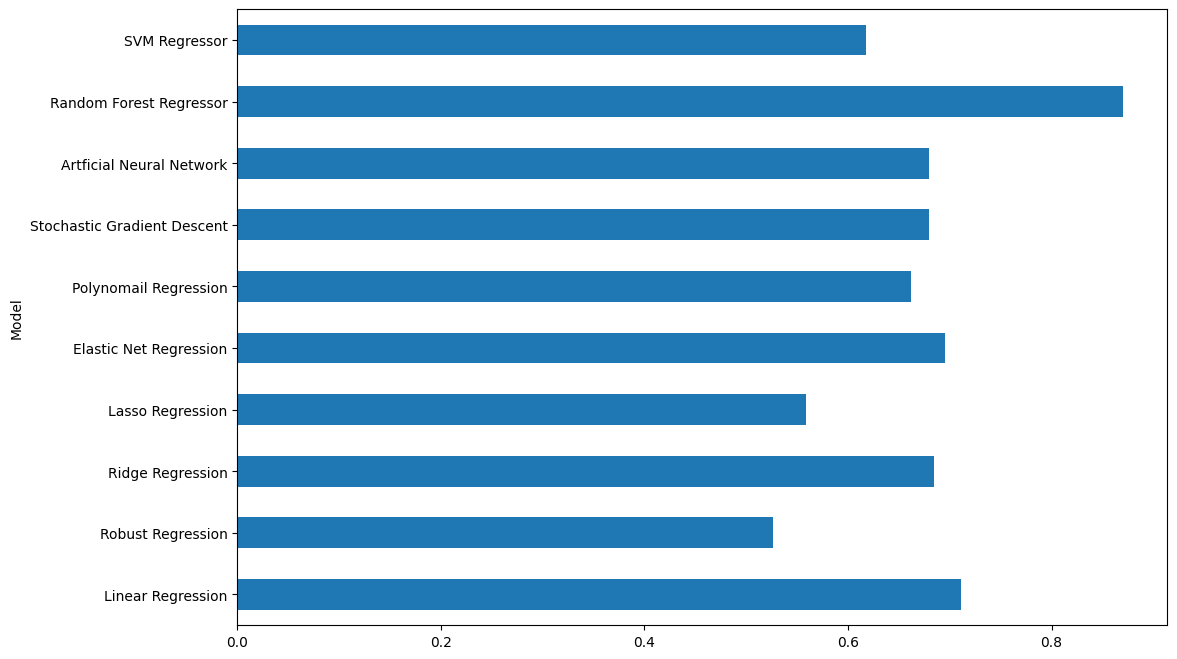

In [87]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

## Cross Validation

In [89]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [90]:
data=pd.read_csv("C:/BITsPilaniMTECH2123/Sem2/ML/Practice_2023/diabetes.csv")
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [91]:
x=data.drop("Outcome",axis=1)
y=data["Outcome"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=51)
print(xtrain.shape)
print(xtest.shape)

(614, 8)
(154, 8)


In [92]:
#creating a fuction
def ModelScore(model):
    model.fit(xtrain,ytrain)
    y_pred=model.predict(xtest)
    accuracy=accuracy_score(ytest,y_pred)
    print("Accuracy score=",accuracy*100)

In [93]:
LG=LogisticRegression()
ModelScore(LG)

Accuracy score= 77.92207792207793


In [ ]:
#Types of cross-validation
#K-fold cross-validation
#Stratified k-fold cross-validation
#Leave-p-out cross-validation
#Leave-one-out cross-validation
#Monte Carlo (shuffle-split)
#Random Split
#HoldOut

### 1) K-fold cross-validation

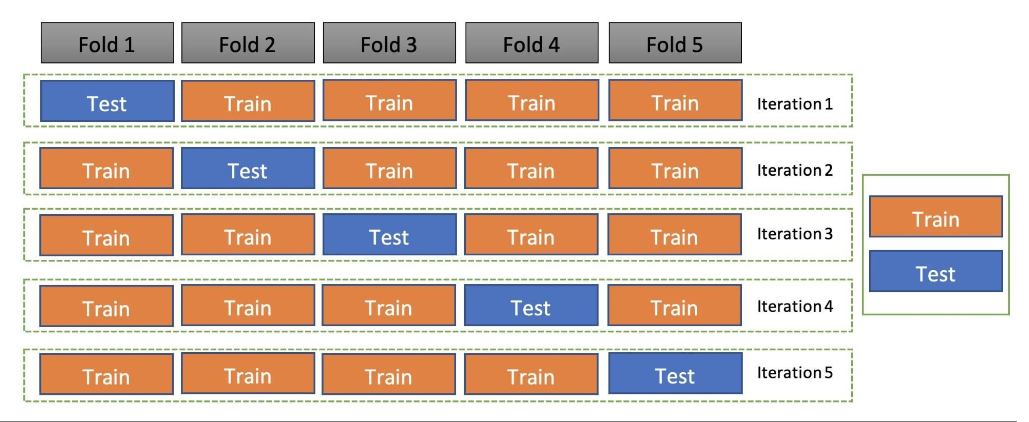

In [94]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

LG=LogisticRegression()
kfold=KFold(n_splits=5)
print("Training Dataset")
train_score=cross_val_score(LG,xtrain,ytrain,cv=kfold)
print("Cross Validation Scores={}".format(train_score))
print("Average Cross Validation Score={}".format(train_score.mean()))
print()
print("Testing Dataset")
test_score=cross_val_score(LG,xtest,ytest,cv=kfold)
print("Cross Validation Scores={}".format(test_score))
print("Average Cross Validation Score={}".format(test_score.mean()))

Training Dataset
Cross Validation Scores=[0.77235772 0.7804878  0.72357724 0.84552846 0.7295082 ]
Average Cross Validation Score=0.7702918832467013

Testing Dataset
Cross Validation Scores=[0.80645161 0.58064516 0.70967742 0.77419355 0.9       ]
Average Cross Validation Score=0.7541935483870967


## 2) Stratified k-fold cross-validation

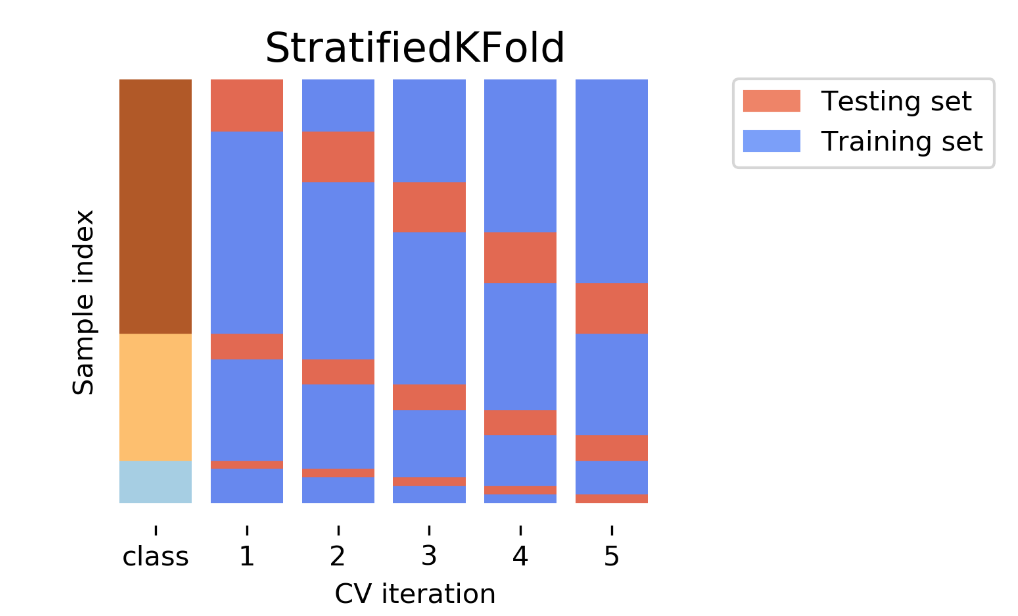

In [95]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

LG=LogisticRegression()
skFold=StratifiedKFold(n_splits=5)

print("Training Dataset")
train_score=cross_val_score(LG,xtrain,ytrain,cv=skFold)
print("Cross Validation Scores={}".format(train_score))
print("Average Cross Validation Score={}".format(train_score.mean()))

print()

print("Testing Dataset")
test_score=cross_val_score(LG,xtest,ytest,cv=skFold)
print("Cross Validation Scores={}".format(test_score))
print("Average Cross Validation Score={}".format(test_score.mean()))

Training Dataset
Cross Validation Scores=[0.77235772 0.76422764 0.7398374  0.8699187  0.70491803]
Average Cross Validation Score=0.7702518992403039

Testing Dataset
Cross Validation Scores=[0.80645161 0.70967742 0.64516129 0.70967742 0.86666667]
Average Cross Validation Score=0.7475268817204301


## 3)Leave-one-out cross-validation

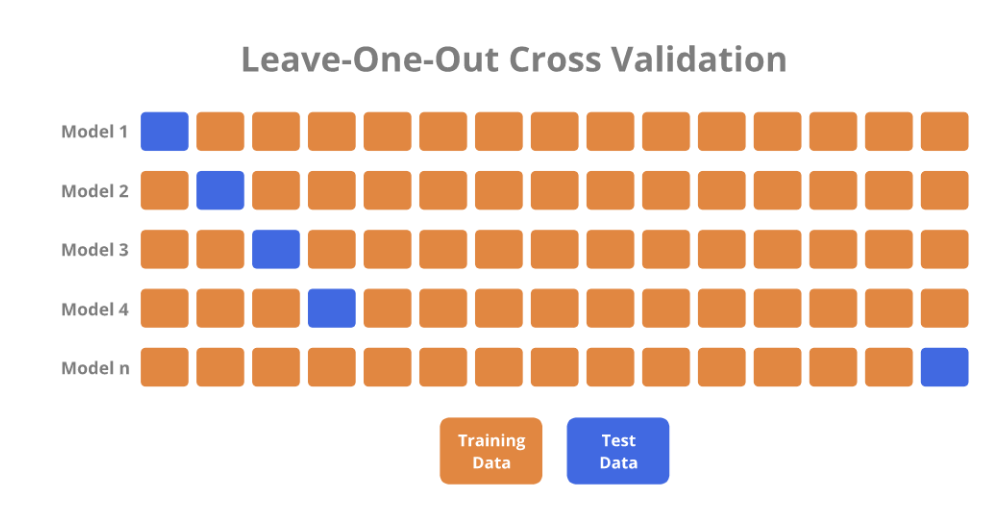

In [96]:
from sklearn.model_selection import LeaveOneOut

LG=LogisticRegression()
Leave=LeaveOneOut()

print("Training Dataset")
train_score=cross_val_score(LG,xtrain,ytrain,cv=Leave)
print("Cross Validation Scores={}".format(train_score))
print("Average Cross Validation Score={}".format(train_score.mean()))

print()


print("Testing Dataset")
test_score=cross_val_score(LG,xtest,ytest,cv=Leave)
print("Cross Validation Scores={}".format(test_score))
print("Average Cross Validation Score={}".format(test_score.mean()))

Training Dataset
Cross Validation Scores=[0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1.
 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 

## 4)Monte Carlo cross-validation or Shuffle Split

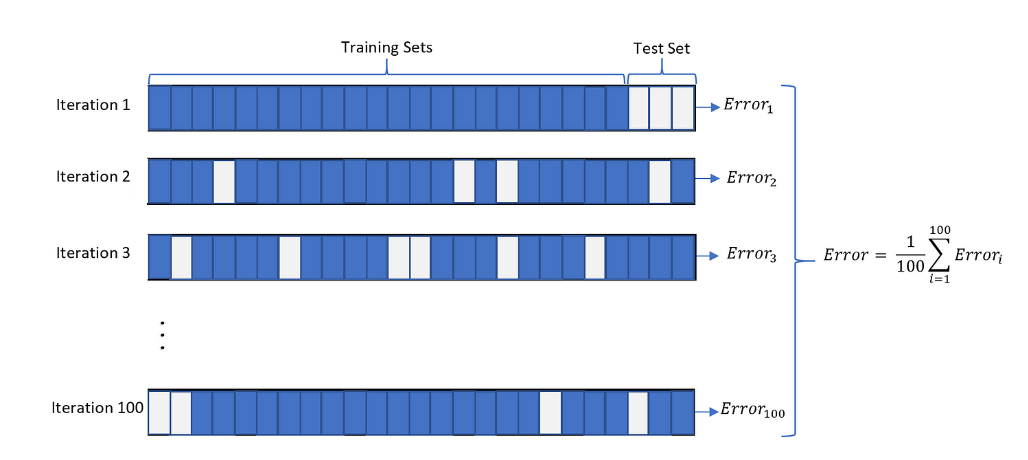

In [97]:
from sklearn.model_selection import ShuffleSplit

LG=LogisticRegression()
shuff=ShuffleSplit(train_size=0.3,test_size=0.5,n_splits=5)

print("Training Dataset")
train_score=cross_val_score(LG,xtrain,ytrain,cv=shuff)
print("Cross Validation Scores={}".format(train_score))
print("Average Cross Validation Score={}".format(train_score.mean()))

print()

print("Testing Dataset")
test_score=cross_val_score(LG,xtest,ytest,cv=shuff)
print("Cross Validation Scores={}".format(test_score))
print("Average Cross Validation Score={}".format(test_score.mean()))

Training Dataset
Cross Validation Scores=[0.73289902 0.7752443  0.77198697 0.72638436 0.78501629]
Average Cross Validation Score=0.7583061889250814

Testing Dataset
Cross Validation Scores=[0.71428571 0.76623377 0.66233766 0.77922078 0.74025974]
Average Cross Validation Score=0.7324675324675325


## 5)Leave-p-out cross-validation

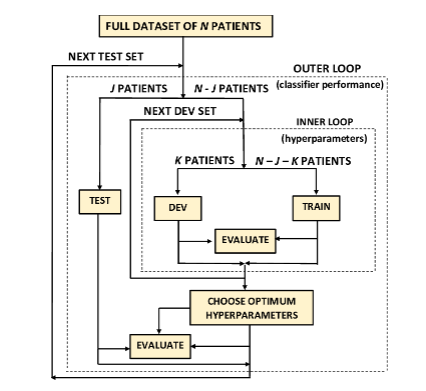

In [98]:
from sklearn.model_selection import LeavePOut


LG=LogisticRegression()
lpo=LeavePOut(p=1)

print("Training Dataset")
train_score=cross_val_score(LG,xtrain,ytrain,cv=lpo)
print("Cross Validation Scores={}".format(train_score))
print("Average Cross Validation Score={}".format(train_score.mean()))

print()

print("Testing Dataset")
test_score=cross_val_score(LG,xtest,ytest,cv=lpo)
print("Cross Validation Scores={}".format(test_score))
print("Average Cross Validation Score={}".format(test_score.mean()))

Training Dataset
Cross Validation Scores=[0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1.
 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 

## 6) Random Split

In [104]:
data=pd.read_csv("C:/BITsPilaniMTECH2123/Sem2/ML/Practice_2023/diabetes.csv")

In [105]:
from sklearn.model_selection import train_test_split
y=data['Outcome']
X=data
X.drop(['Outcome'],axis=1,inplace=True)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,stratify=y,random_state = 1)

## 7) HoldOut

In [106]:
#Times Series Data

In [ ]:
#Hyperparameter Tuning 
#Grid Search CV
#Random Search CV

#### Manual: select hyperparameters based on intuition/experience/guessing, train the model with the hyperparameters, and score on the validation data. Repeat process until you run out of patience or are satisfied with the results.
#### Grid Search: set up a grid of hyperparameter values and for each combination, train a model and score on the validation data. In this approach, every single combination of hyperparameters values is tried which can be very inefficient!
#### Random search: set up a grid of hyperparameter values and select random combinations to train the model and score. The number of search iterations is set based on time/resources.
#### Automated Hyperparameter Tuning: use methods such as gradient descent, Bayesian Optimization, or evolutionary algorithms to conduct a guided search for the best hyperparameters.

In [1]:
#https://www.kaggle.com/code/faressayah/practical-introduction-to-10-regression-algorithm
#https://www.kaggle.com/code/aashita/regression-algorithms
#https://www.kaggle.com/code/kuchhbhi/cross-validation-and-it-s-types/notebook
#https://www.kaggle.com/code/maheshkhanapure/cross-validation-and-types
#https://www.kaggle.com/code/willkoehrsen/intro-to-model-tuning-grid-and-random-search
#https://www.kaggle.com/code/vikumsw/guide-on-hyperparameter-tuning-using-gridsearchcv

## Data Drift and Model Drift

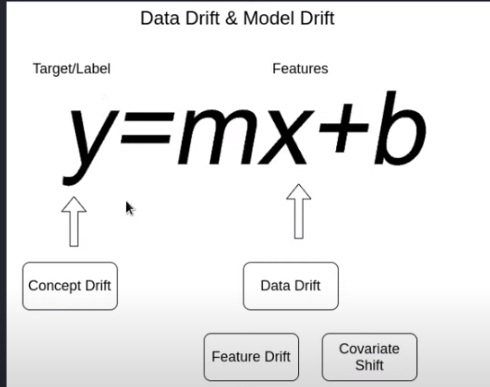

### Model drift:

### Model drift so called model decay, refers to the degradation of machine learning model performance over time. This means that the model suddenly or gradually starts to provide predictions with lower accuracy compared to its performance during the training period.

###  1) Concept drift
### Concept drift happens when the relationship between input variables (or independent variables) and the target variable (or dependent variable) changes. This means that the definition of what we are trying to predict changes so that our algorithm provides inaccurate predictions. This change can be gradual, sudden, or recurring.

### Concept drift means that the statistical properties of the target variable, which the model is trying to predict, change over time. This causes problems because the predictions become less accurate and become unreliable.

### 2) Prior probability shift 
### Prior probability shift is the shift in target variable. For example, a model trained on a dataset where the classes are balanced may experience prior probability shift if it is deployed on a dataset where one class is much more prevalent than the other.

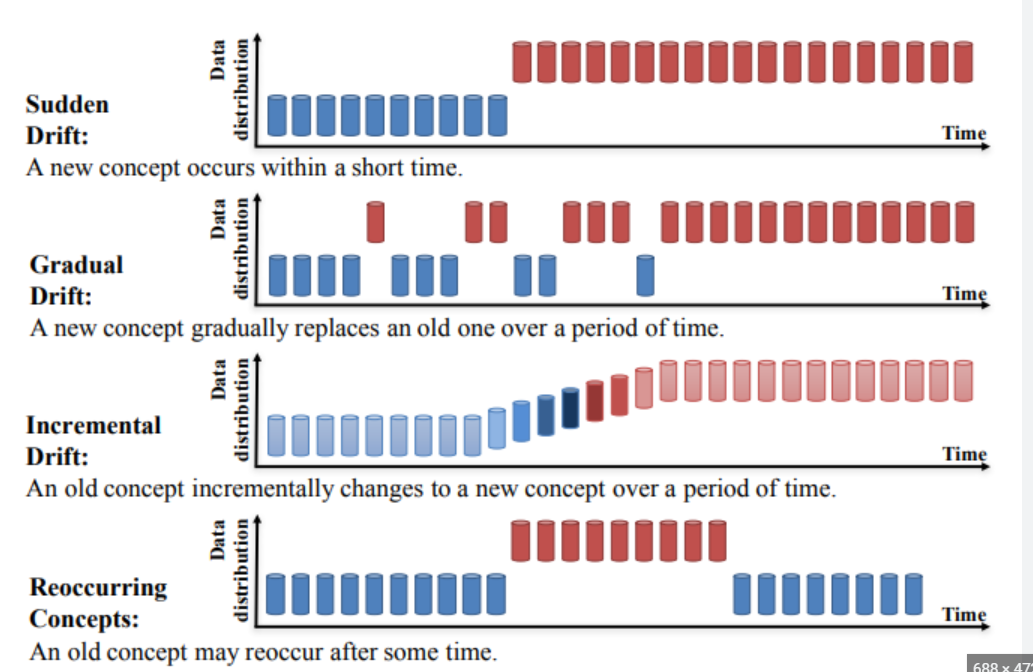

### Gradual concept drift: The change in fraudulent behavior is an example of gradual concept drift. As fraud detection methods become more sophisticated, fraudsters adapt to evade fraud detection systems by developing new strategies. An ML model trained on historical fraudulent transaction data would be unable to classify a new strategy as fraud. This means that the performance of the model would degrade because what is classified as fraud has changed over time.
### Sudden concept drift: The Covid-19 pandemic suddenly changed consumer behavior. For instance, consumer spending on recreational durable goods such as home fitness equipment increased by 18%, while spending on transportation services decreased by 23% in 2020. A demand forecasting model trained with pre-pandemic data would not predict these changes in consumer habits.
### Recurring concept drift: This is also called seasonality. For instance, retail sales increase significantly during the Christmas season or on Black Friday. An ML model that does not take these known recurring trend changes into account would provide inaccurate predictions for these periods.

### Data drift:

### Data drift occurs when the statistical properties of the input data change. For instance, as an online platform grows, the age distribution of its users may change over time. Since the usage habits of young and old people are not the same, a model trained on young people’s usage data would provide inaccurate predictions for old people’s behavior.

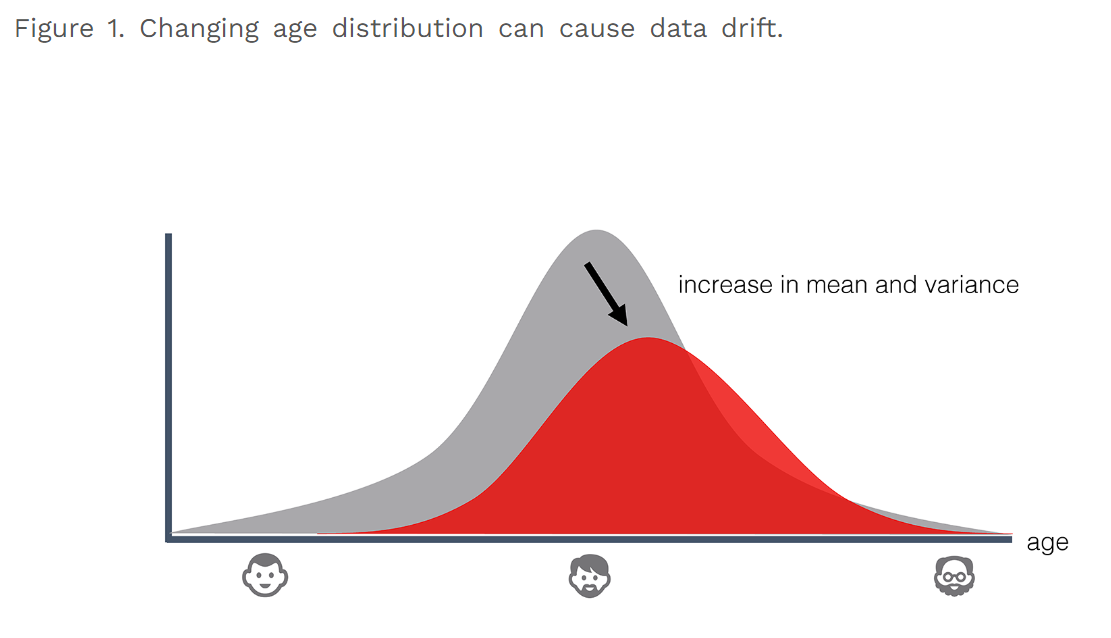

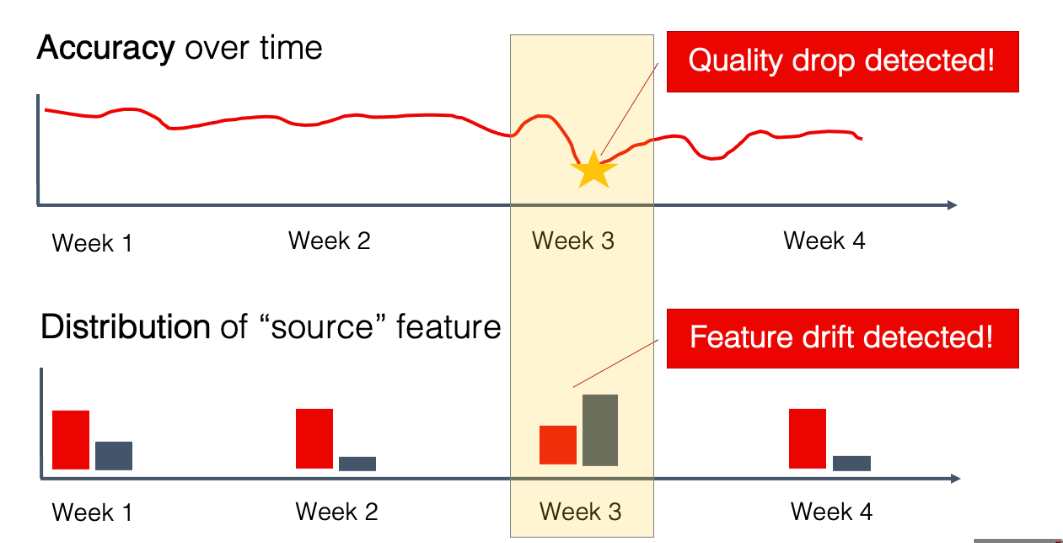

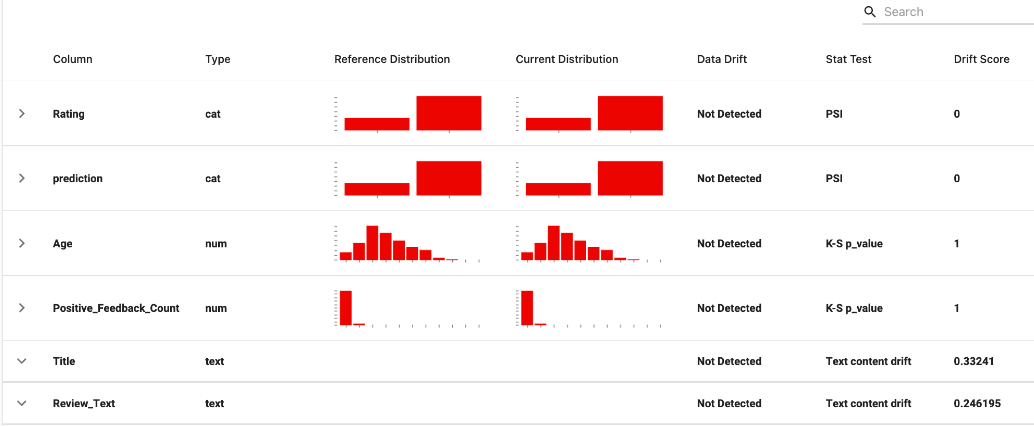

## Methods for Detecting Data & Model Drift

## 1) Kolmogorov-Smirnov (K-S) test:
### The Kolmogorov-Smirnov (K-S) test is a nonparametric statistical test that is used to determine whether two sets of data come from the same distribution. It is often used to test whether a sample of data comes from a specific population or to compare two samples to determine if they come from the same population.
### The null hypothesis in this test is that the distributions are the same. If this hypothesis is rejected, it suggests that there is a drift in the model.
### The K-S test is a useful tool for comparing datasets and determining whether they come from the same distribution.

## 2) Population Stability Index:
### The Population Stability Index (PSI) is a statistical measure that is used to compare the distribution of a categorical variable in two different datasets. 

### The Population Stability Index (PSI) is a tool used to measure how much the distribution of a variable has changed between two samples or over time. It is commonly used to monitor changes in the characteristics of a population and to identify potential problems with the performance of a machine learning model.

### The PSI was originally developed to monitor changes in the distribution of a score in risk scorecards, but it is now used to examine distributional shifts for all model-related attributes, including both dependent and independent variables. 

### A high PSI value indicates that there is a significant difference between the distributions of the variable in the two datasets, which may suggest that there is a drift in the model. 

### If the distribution of a variable has changed significantly, or if several variables have changed to some extent, it may be necessary to recalibrate or rebuild the model to improve its performance.

## 3) Model-Based Approach:
### A Machine Learning-based model approach can also be used to detect data drift between two populations.

## 4) Using specialized drift detection techniques such as Adaptive Windowing (ADWIN):
### The Adaptive Windowing (ADWIN) algorithm uses a sliding window approach to detect concept drift. Window size is fixed and ADWIN slides the fixed window for detecting any change on the newly arriving data. When two sub-windows show distinct means in the new observations the older sub-window is dropped.

## 5) Page-Hinkley method:
### The Page-Hinkley method is a statistical method used to detect changes in the mean of a series of data over time. It is commonly used to monitor the performance of machine learning models and detect changes in the distribution of the data that may indicate model drift.

## 6) Chi Square Test:
### For checking if there is change in frequency distribution of two samples

In [7]:
import pandas as pd

In [9]:
data=pd.read_csv("C:/BITsPilaniMTECH2123/Sem2/ML/Practice_2023/marketing_campaign.csv", sep= "\t")
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [11]:
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [13]:
data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [14]:
#very in-frequent categories, removing for proper/stable chi-square statistics
data = data[~data.isin(['Alone', 'Absurd','YOLO'])]

In [15]:
cols = ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome','Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']


data = data[cols]

In [16]:
#We will create two samples to perform 2-sample tests, which are helpful for data-drift detection
data_1 = data.sample(frac=0.5)
data_2 = data.sample(frac=0.5)

In [17]:
display(data_1.head())

print('\n\n')

display(data_2.head())

Year_Birth   Education Marital_Status   Income  Kidhome Dt_Customer  \
2068        1984  Graduation        Married  31761.0        1  05-04-2014   
2074        1983  Graduation        Married  69520.0        0  07-07-2013   
1537        1959         PhD          Widow  67786.0        0  07-12-2013   
1995        1980    2n Cycle        Married  96547.0        0  23-05-2014   
1274        1968      Master       Divorced  23748.0        1  21-11-2012   

      Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
2068       96        19          1               20               16   
2074       95       627        120              414              121   
1537        0       431         82              441               80   
1995        4       448         21              125               52   
1274       97         6          6               29               12   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
2068                14            28                  2                3   
2074                80            93                  1                9   
1537                20           102                  1                3   
1995               101            62                  0                7   
1274                15             8                  3                2   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  
2068                    0                  4                  5  
2074                    6                  5                  5  
1537                    6                  6                  1  
1995                    6                  8                  2  
1274                    1                  3                  8

Year_Birth Education Marital_Status   Income  Kidhome Dt_Customer  \
1686        1980    Master       Divorced  78789.0        0  08-08-2012   
2148        1973       PhD       Together  63516.0        1  06-07-2013   
1753        1949       PhD          Widow  51569.0        0  12-02-2013   
71          1973  2n Cycle        Married      NaN        1  14-09-2012   
1854        1984       PhD         Single  82733.0        0  10-09-2013   

      Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
1686       12       667         50              850               21   
2148       30       141         11              114               15   
1753       39       380          0               47                6   
71         25        25          3               43               17   
1854       28       712         50              420               65   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
1686                83            83                  1                4   
2148                14             5                  4                4   
1753                 0            34                  4                7   
71                   4            17                  3                3   
1854                38            38                  1                8   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  
1686                    6                  5                  2  
2148                    1                  7                  5  
1753                    1                  7                  8  
71                      0                  3                  8  
1854                    4                  7                  4

In [19]:
#Kolmogorov-Smirnov Test
#We will perform Kolmogorov-Smirnov (K-S) test for detecting whether the two samples are identical or not for numeric data

In [18]:
'''
 `two-sided`: The null hypothesis is that the two distributions are identical, F(x)=G(x) for all x; 
  the alternative is that they are not identical.
  
'''
from scipy import stats
import random

numeric_cols = ['Income',  'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

#Significance level
p_value = 0.05
rejected = 0

for col in numeric_cols:
    test = stats.ks_2samp(data_1[col], data_2[col])

    print(col, test)
    if test[1] < p_value:
        rejected += 1
        print("Column rejected", col)

print("We rejected ",rejected," columns in total out of {} columns".format(len(numeric_cols)))

Income KstestResult(statistic=0.026785714285714284, pvalue=0.8167638092508208)
Recency KstestResult(statistic=0.01607142857142857, pvalue=0.998711583767401)
MntWines KstestResult(statistic=0.016964285714285713, pvalue=0.9970680991992215)
MntFruits KstestResult(statistic=0.025892857142857145, pvalue=0.8472105468520287)
MntMeatProducts KstestResult(statistic=0.01875, pvalue=0.9893332558187384)
MntFishProducts KstestResult(statistic=0.025892857142857145, pvalue=0.8472105468520287)
MntSweetProducts KstestResult(statistic=0.029464285714285714, pvalue=0.716045150544967)
MntGoldProds KstestResult(statistic=0.01875, pvalue=0.9893332558187384)
NumDealsPurchases KstestResult(statistic=0.022321428571428572, pvalue=0.9431423916136951)
NumWebPurchases KstestResult(statistic=0.015178571428571428, pvalue=0.999515760916742)
NumCatalogPurchases KstestResult(statistic=0.01607142857142857, pvalue=0.998711583767401)
NumStorePurchases KstestResult(statistic=0.01875, pvalue=0.9893332558187384)
NumWebVisitsM

In [20]:
#Let's assume the income of people increased by 10-20% in future.
data_2_future = data_2.copy()
pct_low = .1
pct_high = .2
data_2_future['Income'] = data_2_future['Income'].apply(lambda v : v * (1 + random.uniform(pct_low,pct_high)))

In [22]:
data_2.describe()
data_2_future.describe()

Year_Birth         Income      Kidhome      Recency     MntWines  \
count  1120.000000    1110.000000  1120.000000  1120.000000  1120.000000   
mean   1968.708929   60098.386135     0.449107    48.965179   296.050000   
std      11.849786   33124.120201     0.539005    29.114020   332.728393   
min    1900.000000    2902.254512     0.000000     0.000000     0.000000   
25%    1959.000000   39926.401585     0.000000    24.000000    22.750000   
50%    1970.000000   58587.829833     0.000000    50.000000   164.000000   
75%    1977.000000   79127.165833     1.000000    74.000000   493.000000   
max    1996.000000  771430.380706     2.000000    99.000000  1478.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  1120.000000      1120.000000      1120.000000       1120.000000   
mean     26.283036       164.065179        36.766964         26.766964   
std      40.685824       225.986765        54.413488         42.256570   
min       0.000000         0.000000         0.000000          0.000000   
25%       2.000000        15.000000         2.000000          1.000000   
50%       8.000000        65.000000        12.000000          8.000000   
75%      32.250000       217.000000        48.000000         31.000000   
max     199.000000      1725.000000       258.000000        263.000000   

       MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count   1120.000000        1120.000000      1120.000000          1120.000000   
mean      43.424107           2.306250         4.080357             2.637500   
std       51.171840           1.920669         2.806027             3.044036   
min        0.000000           0.000000         0.000000             0.000000   
25%        9.000000           1.000000         2.000000             0.000000   
50%       25.000000           2.000000         4.000000             2.000000   
75%       56.250000           3.000000         6.000000             4.000000   
max      362.000000          15.000000        27.000000            28.000000   

       NumStorePurchases  NumWebVisitsMonth  
count         1120.00000        1120.000000  
mean             5.73125           5.366964  
std              3.27720           2.403858  
min              0.00000           0.000000  
25%              3.00000           4.000000  
50%              5.00000           6.000000  
75%              8.00000           7.000000  
max             13.00000          20.000000

In [21]:
'''
 `two-sided`: The null hypothesis is that the two distributions are
  identical, F(x)=G(x) for all x; the alternative is that they are not
  identical.
  
'''
from scipy import stats
import random

numeric_cols = ['Income',  'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

#Significance level

p_value = 0.05
rejected = 0

for col in numeric_cols:
    test = stats.ks_2samp(data_1[col], data_2_future[col])

    print(col, test)
    if test[1] < p_value:
        rejected += 1
        print("Column rejected", col)

print("We rejected ",rejected," columns in total out of {} columns".format(len(numeric_cols)))

Income KstestResult(statistic=0.1419642857142857, pvalue=2.945903839963218e-10)
Column rejected Income
Recency KstestResult(statistic=0.01607142857142857, pvalue=0.998711583767401)
MntWines KstestResult(statistic=0.016964285714285713, pvalue=0.9970680991992215)
MntFruits KstestResult(statistic=0.025892857142857145, pvalue=0.8472105468520287)
MntMeatProducts KstestResult(statistic=0.01875, pvalue=0.9893332558187384)
MntFishProducts KstestResult(statistic=0.025892857142857145, pvalue=0.8472105468520287)
MntSweetProducts KstestResult(statistic=0.029464285714285714, pvalue=0.716045150544967)
MntGoldProds KstestResult(statistic=0.01875, pvalue=0.9893332558187384)
NumDealsPurchases KstestResult(statistic=0.022321428571428572, pvalue=0.9431423916136951)
NumWebPurchases KstestResult(statistic=0.015178571428571428, pvalue=0.999515760916742)
NumCatalogPurchases KstestResult(statistic=0.01607142857142857, pvalue=0.998711583767401)
NumStorePurchases KstestResult(statistic=0.01875, pvalue=0.9893332

In [23]:
#There is a detected data-drift in Income column now.
#pvalue < acceptance threshold (0.05)

In [26]:
#Population Stability Index
#Population Stability Index: PSI is a symmetric version of KL Divergence. 
#It's used a lot in financial domain and below are some widely accepted threshold for it. 
#It's used for detecting the data-drift in numerical columns.

#a) When PSI<=0.1
#This means there is no change or shift in the distributions of both datasets.

#b) 0.1< PSI<0.2
#This indicates a slight change or shift has occurred.

#c) PSI>0.2
#This indicates a large shift in the distribution has occurred between both datasets.

In [27]:
import numpy as np

def calculate_psi(expected, actual, buckettype='bins', buckets=10, axis=0):
    '''Calculate the PSI (population stability index) across all variables
    Args:
       expected: numpy matrix of original values
       actual: numpy matrix of new values, same size as expected
       buckettype: type of strategy for creating buckets, bins splits into even splits, quantiles splits into quantile buckets
       buckets: number of quantiles to use in bucketing variables
       axis: axis by which variables are defined, 0 for vertical, 1 for horizontal
    Returns:
       psi_values: ndarray of psi values for each variable
    Author:
       Matthew Burke
       github.com/mwburke
       worksofchart.com
    '''

    def psi(expected_array, actual_array, buckets):
        '''Calculate the PSI for a single variable
        Args:
           expected_array: numpy array of original values
           actual_array: numpy array of new values, same size as expected
           buckets: number of percentile ranges to bucket the values into
        Returns:
           psi_value: calculated PSI value
        '''

        def scale_range (input, min, max):
            input += -(np.min(input))
            input /= np.max(input) / (max - min)
            input += min
            return input


        breakpoints = np.arange(0, buckets + 1) / (buckets) * 100

        if buckettype == 'bins':
            breakpoints = scale_range(breakpoints, np.min(expected_array), np.max(expected_array))
        elif buckettype == 'quantiles':
            breakpoints = np.stack([np.percentile(expected_array, b) for b in breakpoints])



        expected_percents = np.histogram(expected_array, breakpoints)[0] / len(expected_array)
        actual_percents = np.histogram(actual_array, breakpoints)[0] / len(actual_array)

        def sub_psi(e_perc, a_perc):
            '''Calculate the actual PSI value from comparing the values.
               Update the actual value to a very small number if equal to zero
            '''
            if a_perc == 0:
                a_perc = 0.0001
            if e_perc == 0:
                e_perc = 0.0001

            value = (e_perc - a_perc) * np.log(e_perc / a_perc)
            return(value)

        psi_value = np.sum(sub_psi(expected_percents[i], actual_percents[i]) for i in range(0, len(expected_percents)))

        return(psi_value)

    if len(expected.shape) == 1:
        psi_values = np.empty(len(expected.shape))
    else:
        psi_values = np.empty(expected.shape[axis])

    for i in range(0, len(psi_values)):
        if len(psi_values) == 1:
            psi_values = psi(expected, actual, buckets)
        elif axis == 0:
            psi_values[i] = psi(expected[:,i], actual[:,i], buckets)
        elif axis == 1:
            psi_values[i] = psi(expected[i,:], actual[i,:], buckets)

    return(psi_values)

In [28]:
for col in numeric_cols:
    val = calculate_psi(data_1[col], data_2[col])
    if val <  0.1:
        print(col, val, "No significant drift/shift detected")
    elif val > 0.1 and val < 0.2:
        print(col, val, "Slight drift/shift detected")
    else:
        print(col, val, "Significant drift/shift detected")

Income 0.0005951731373340729 No significant drift/shift detected
Recency 0.006061730929746903 No significant drift/shift detected
MntWines 0.007571641757662287 No significant drift/shift detected
MntFruits 0.01264575314709808 No significant drift/shift detected
MntMeatProducts 0.007598992028661591 No significant drift/shift detected
MntFishProducts 0.00952339615328536 No significant drift/shift detected
MntSweetProducts 0.006484250930567931 No significant drift/shift detected
MntGoldProds 0.00717298443524267 No significant drift/shift detected
NumDealsPurchases 0.006345762971117786 No significant drift/shift detected
NumWebPurchases 0.0055555379639281345 No significant drift/shift detected
NumCatalogPurchases 0.0011475397302803867 No significant drift/shift detected
NumStorePurchases 0.010312788837000611 No significant drift/shift detected
NumWebVisitsMonth 0.004248975221875292 No significant drift/shift detected


C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_2236\3378259138.py:60: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  psi_value = np.sum(sub_psi(expected_percents[i], actual_percents[i]) for i in range(0, len(expected_percents)))


In [29]:
#Chi-square test for homogeneity
#Test for detecting whether the two samples are identical or not for categorical data

In [30]:
from scipy.stats import chi2_contingency

def drift_chisquare(sample1, sample2):
    return chi2_contingency([sample1, sample2])[1]

In [32]:
#Let's look at categorcial variables
categorical_cols = ['Education', 'Marital_Status',]

for col in categorical_cols:
    print(col, set(data[col].values))

Education {'Graduation', '2n Cycle', 'PhD', 'Basic', 'Master'}
Marital_Status {nan, 'Divorced', 'Together', 'Single', 'Married', 'Widow'}


In [33]:
for col in categorical_cols:
    val = drift_chisquare(data_1[col].value_counts(),data_2[col].value_counts() )
    
    print(col,val)
    rejected = 0
    if val < p_value:
        rejected += 1
        print("Column rejected", col)

print("We rejected ",rejected," columns in total out of {} columns".format(len(categorical_cols)))

Education 0.6385530772061712
Marital_Status 0.9267814003795665
We rejected  0  columns in total out of 2 columns


In [34]:
#Let's assume married population increased by 15% in future.
def future_marital_status(v):
    if v == "Married":
        return v
    else:
        coin_toss = random.uniform(0,1)
        if coin_toss > 0.15:
            return v
        return 'Married'
    
data_2_future['Marital_Status'] = data_2_future['Marital_Status'].apply(lambda v : future_marital_status(v))

In [35]:
data_2['Marital_Status'].value_counts(), data_2_future['Marital_Status'].value_counts()

(Married     418
 Together    293
 Single      250
 Divorced    123
 Widow        34
 Name: Marital_Status, dtype: int64,
 Married     510
 Together    254
 Single      220
 Divorced    103
 Widow        32
 Name: Marital_Status, dtype: int64)

In [36]:
for col in categorical_cols:
    val = drift_chisquare(data_1[col].value_counts(),data_2_future[col].value_counts() )
    print(col,val)
    rejected = 0
    if val < p_value:
        rejected += 1
        print("Column rejected", col)

print("We rejected ",rejected," columns in total out of {} columns".format(len(categorical_cols)))

Education 0.6385530772061712
Marital_Status 0.0023021397749023466
Column rejected Marital_Status
We rejected  1  columns in total out of 2 columns


In [37]:
#Chi-square test works well with even two samples with difference sizes but should have same number of categories
drift_chisquare([1,1,1],[1000,1000,1000])

1.0

In [41]:
data_1['SAMPLE'] = 'ONE'
data_2['SAMPLE'] = 'TWO'
data_12 = pd.concat([data_1,data_2])
data_12.shape

(2240, 19)

In [42]:
data_12.head(2)

Year_Birth   Education Marital_Status   Income  Kidhome Dt_Customer  \
2068        1984  Graduation        Married  31761.0        1  05-04-2014   
2074        1983  Graduation        Married  69520.0        0  07-07-2013   

      Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
2068       96        19          1               20               16   
2074       95       627        120              414              121   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
2068                14            28                  2                3   
2074                80            93                  1                9   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth SAMPLE  
2068                    0                  4                  5    ONE  
2074                    6                  5                  5    ONE

In [45]:
import plotly.express as px
fig = px.histogram(data_12,x="Recency",color="SAMPLE")
fig.show()

In [46]:
fig = px.box(data_12,x="Recency",color="SAMPLE")
fig.show()

In [47]:
fig = px.histogram(data_12,x="Education",color="SAMPLE")
fig.show()

In [ ]:
#Deepchecks
#https://medium.com/snowflake/using-deepchecks-for-monitoring-data-and-model-drift-in-snowflake-f1d4d872322

## Handling data and model drift in production

### 1)  Update model: This is a naïve approach. There is no proactive drift detection. Models are periodically retrained and updated with recent data. Without drift detection in place, it is difficult to estimate the time interval for re-training and model re-deployment.

### 2) Training with weighted data: When a new model is trained instead of discarding old training data, use weight inversely proportional to the age of data.

### 3) Incremental learning: As new data arrives, the models are continuously retrained and updated. As a result, the model is always adapting to the changes in the data distribution. This approach will work with machine learning models which allow incremental learning one instance of data at a time.

### 4) Check data quality: Independent values going to the model

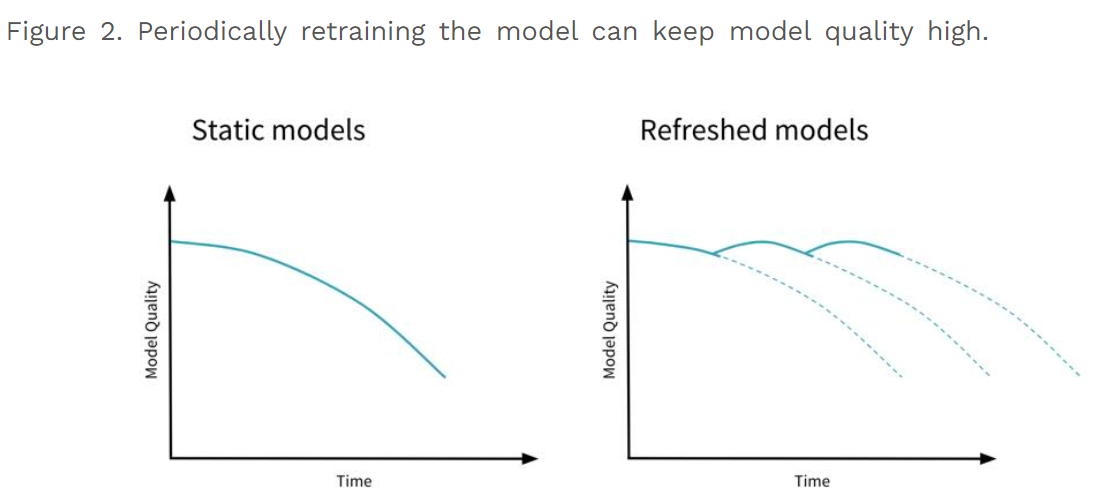

## Deepchecks
#### Data Drift & Model Drift Detection
#### Data Drift
#### If there is changes in the data, we normally call it as Data Drift or Data Shift. A Data Drift can also refer to

#### changes in the input data
#### changes in the values of the features used to define or predict a target label.
#### changes in the properties of the independent variable
#### Model Drift
#### This refers to changes in the performance of the model over time. It is the deterioration of models over time in the case of accuracy and prediction. ML Models do not live in a static environment hence they will deteriorate or decay over time.

#### Deepchecks
#### Useful for detecting data drift,data integrity,model performance,etc
#### pip install deepchecks

In [50]:
# Load Packages
import pandas as pd 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#### Build A Model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [51]:
# load data
df = pd.read_csv("C:/BITsPilaniMTECH2123/Sem2/ML/Practice_2023/bank-additional-full_encoded.csv")
df.head()

age  job  marital  education  default  housing  loan  contact  month  \
0   56    0        0          0        0        0     0        0      0   
1   57    1        0          1        1        0     0        0      0   
2   37    1        0          1        0        1     0        0      0   
3   40    2        0          2        0        0     0        0      0   
4   56    1        0          1        0        0     1        0      0   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            0  ...         1    999         0         0           1.1   
1            0  ...         1    999         0         0           1.1   
2            0  ...         1    999         0         0           1.1   
3            0  ...         1    999         0         0           1.1   
4            0  ...         1    999         0         0           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.4      4.857       5191.0  0  
1          93.994          -36.4      4.857       5191.0  0  
2          93.994          -36.4      4.857       5191.0  0  
3          93.994          -36.4      4.857       5191.0  0  
4          93.994          -36.4      4.857       5191.0  0  

[5 rows x 21 columns]

In [52]:
# Features & Labels
Xfeatures = df.drop('y',axis=1)
# Select last column of dataframe as a dataframe object
ylabels = df.iloc[: , -1:]

In [53]:
# Split Dataset
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=7)

In [55]:
# Build the Model
pipe_lr = Pipeline(steps=[('sc',StandardScaler()),('lr',LogisticRegression())])
pipe_lr

Pipeline(steps=[('sc', StandardScaler()), ('lr', LogisticRegression())])

In [56]:
# Train to Fit
pipe_lr.fit(x_train,y_train)

C:\Users\Abhishek Jaiswal\.conda\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Pipeline(steps=[('sc', StandardScaler()), ('lr', LogisticRegression())])

In [57]:
# Accuarcy
pipe_lr.score(x_test,y_test)

0.9105770008901837

In [66]:
#Using Deepchecks for Offline ML Data Drift Detection

In [65]:
import deepchecks

In [67]:
# Method
dir(deepchecks)

['BaseCheck',
 'BaseSuite',
 'CheckFailure',
 'CheckResult',
 'Condition',
 'ConditionCategory',
 'ConditionResult',
 'Context',
 'Dataset',
 'ModelComparisonCheck',
 'ModelComparisonSuite',
 'ModelOnlyBaseCheck',
 'ModelOnlyCheck',
 'SingleDatasetBaseCheck',
 'SingleDatasetCheck',
 'Suite',
 'SuiteResult',
 'TrainTestBaseCheck',
 'TrainTestCheck',
 '_SubstituteModule',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__original_module__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '__warningregistry__',
 '_init_module_attrs',
 'analytics',
 'core',
 'get_verbosity',
 'is_notebook',
 'matplotlib',
 'os',
 'pio',
 'pio_backends',
 'set_verbosity',
 'sys',
 'tabular',
 'types',
 'utils',
 'validate_latest_version',
 'version',
 'warnings']

In [68]:
#Full Suite
#Data Drift Detection
#Model Performance /Confidence
#Data Integrity Check
#Label Ambuiguity
#Other checks

In [70]:
from deepchecks.suites import full_suite
# Create the Dataset Objects
ds_train = deepchecks.Dataset(df=x_train,label=y_train,cat_features=[])
ds_test = deepchecks.Dataset(df=x_test,label=y_test,cat_features=[])

C:\Users\Abhishek Jaiswal\.conda\envs\mlenv\lib\site-packages\deepchecks\__init__.py:136: DeprecationWarning:

Ability to import base tabular functionality from the `deepchecks` package directly is deprecated, please import from `deepchecks.tabular` instead

C:\Users\Abhishek Jaiswal\.conda\envs\mlenv\lib\site-packages\deepchecks\__init__.py:136: DeprecationWarning:

Ability to import base tabular functionality from the `deepchecks` package directly is deprecated, please import from `deepchecks.tabular` instead



In [72]:
# Create the suite
fsuite = full_suite()
results = fsuite.run(train_dataset=ds_train,test_dataset=ds_test,model=pipe_lr)

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 10 seconds


In [73]:
results

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_28QHEX1OTJCBORR5HOSBPOK4T">Full Suite</h1>\n<…

In [74]:
#Feature/Data Drift
from deepchecks.checks import TrainTestFeatureDrift
check = TrainTestFeatureDrift()
result = check.run(train_dataset=ds_train, test_dataset=ds_test, model=pipe_lr)
result

C:\Users\Abhishek Jaiswal\.conda\envs\mlenv\lib\site-packages\deepchecks\checks.py:21: DeprecationWarning:

Ability to import tabular checks from the `deepchecks.checks` is deprecated, please import from `deepchecks.tabular.checks` instead

C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_2236\2709628191.py:3: DeprecationWarning:

The TrainTestFeatureDrift check is deprecated and will be removed in the 0.14 version. Please use the FeatureDrift check instead

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 17 seconds


In [75]:
### Label Drift
from deepchecks.checks import TrainTestLabelDrift
lcheck = TrainTestLabelDrift()
lresult = lcheck.run(train_dataset=ds_train, test_dataset=ds_test)

C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_2236\1610446401.py:3: DeprecationWarning:

The TrainTestLabelDrift check is deprecated and will be removed in the 0.14 version.Please use the LabelDrift check instead.



In [76]:
lresult

In [81]:
#Dataset Integrity Checks using Deepchecks
import pandas as pd
import deepchecks
from deepchecks.suites import single_dataset_integrity

ImportError: cannot import name 'single_dataset_integrity' from 'deepchecks.suites' (C:\Users\Abhishek Jaiswal\.conda\envs\mlenv\lib\site-packages\deepchecks\suites.py)

In [ ]:
# Fxn
integrity = single_dataset_integrity()
integrity.run(df)

In [ ]:
#https://github.com/Jcharis/Python-Machine-Learning/blob/master/Pandas_Pipes_n_Scikit-Learn_Pipelines/Pandas_pipes_n_scikitlearn_pipelines_tutorial.pdf
#https://github.com/Jcharis/Python-Machine-Learning/blob/master/Data_Drift_Detection_Using_Deep_Checks/Data%20Drift%20Detection%20Using%20Deepchecks.ipynb

In [ ]:
#https://www.analyticsvidhya.com/blog/2021/10/mlops-and-the-importance-of-data-drift-detection/
#https://towardsdatascience.com/how-to-detect-drift-in-machine-learning-models-8a0be4049eed
#https://research.aimultiple.com/model-drift/
#https://www.kaggle.com/code/abhishekmungoli/data-drift/notebook